# Datascience Practical: 9 Logistic Regression

# `180280116040` Dharmistha Kosti

**Dataset: MNIST Digit Dataset**

**Algorithm: Logistic Regression**

A lot of classification models like logistic regression were originally designed for binary classification, that is predicting whether something is one thing or another. For datasets with more than two classes, what do you do? **For multiclass classification problems**, one approach is to split the task into multiple binary classification datasets and fit a binary classification model on each. I will explore the One-vs-Rest strategy and how one can apply it to logisitic regression using Scikit-Learn.

## One-vs-Rest

One Versus Rest (OvR), which is also called one versus all (OvA) is a technique that extends binary classifiers to multi-class problems. Here is how it works: 

* You train one classifier per class, where one class is treated as the positive class and the other classes are considered negative classes. 

For example, say you have an image recogition task. Your dataset has 4 classes, the digits 0, 1, 2, and 3. Your goal is to classify them. Using the one versus rest approach, you break down the task into 4 binary classification problems. 

Binary Classification Problem 1: digit 0 vs digits 1, 2, and 3

Binary Classification Problem 2: digit 1 vs digits 0, 2, and 3

Binary Classification Problem 3: digit 2 vs digits 0, 1, and 3

Binary Classification Problem 4: digit 3 vs digits 0, 1, and 2

From there, if you want to classify a new sample, you would use each of the classifiers. The model that predicts the highest class probability is the predicted class. 

## 1) Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

## 2) Load the Dataset
 The code below loads the digits dataset which is arranged in a csv file for convenience. The data consists of pixel intensity values for 720 images that are 8 by 8 pixels. Each image is labeled with a number from 0-3. 

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\dataset/train1.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

## 3) Visualize Each Digit

In [5]:
pixel_colnames = df.columns[:-1]

In [6]:
pixel_colnames

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel773', 'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778',
       'pixel779', 'pixel780', 'pixel781', 'pixel782'],
      dtype='object', length=784)

In [7]:
# Get all columns except the label column for the first image
#get first row data by row-number(pixel_colnames)
image_values = df.loc[0, pixel_colnames].values

In [8]:
image_values

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

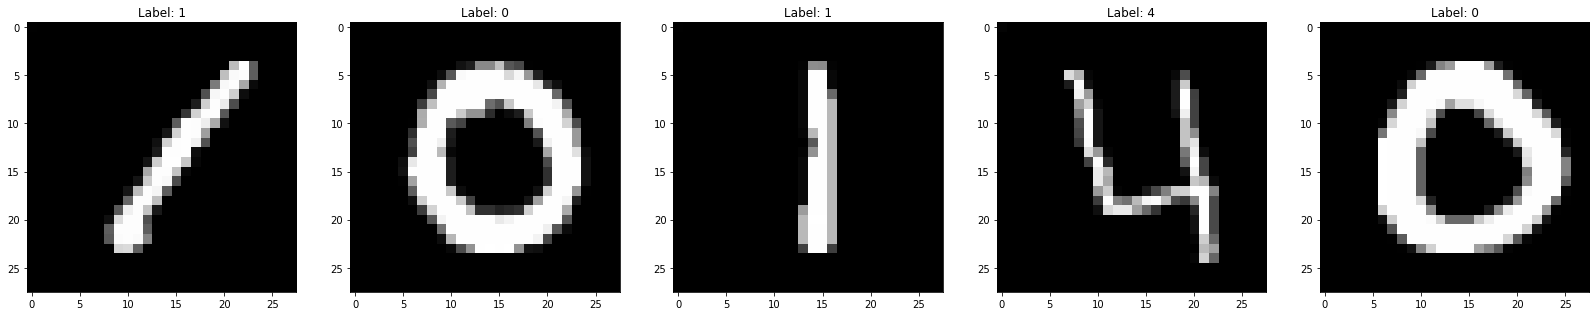

In [10]:
plt.figure(figsize=(28,28))
#here we can plot max 5 subplot
for index in range(0, 5):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap ='gray')
    plt.title('Label: ' + str(image_label))

In [11]:
df[pixel_colnames]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Splitting Data into Training and Test Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)

## 5) Standardize the Data
Logistic Regression is effected by scale so we need to scale the features in the data before using Logistic Regresison. we can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note we can fit on the training set and transform on the training and test set.

In [13]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 6) Logistic Regression

In [16]:
# multi_class is specifying one versus rest
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.9778095238095238
Test accuracy: 0.9540952380952381


Both the training and test accuracies are very high. Since the Logistic Regression instance was fit on a multiclass dataset via the OvR approach, the first intercept belongs to the model that fits digit 0 versus digits 1,2, and 3. The second value is the intercept of the model that fits digit 1 versus digits 0,2, and 3. Etc. 

In [17]:
clf.intercept_

array([ -9.85406503, -12.05665726,  -9.13086718,  -8.64647028,
       -11.02892999,  -7.3618108 , -12.67760445, -11.37451686,
       -12.810911  , -15.68495493])

Similarly, you can get 4 different coefficient matrices. 

In [18]:
clf.coef_.shape

(10, 784)

## 7) Predictions

In [19]:
# The second class is the highest score so it will be the prediction for this data
clf.predict_proba(X_test[0:1])

array([[4.42509874e-03, 1.20387055e-11, 4.08271829e-06, 9.18723514e-01,
        4.66606650e-06, 7.68413343e-02, 1.53662902e-11, 6.37071665e-07,
        6.66997969e-07, 5.52554629e-12]])

In [20]:
clf.predict(X_test[0:1])

array([3], dtype=int64)

In [21]:
score = clf.score(X_test, y_test)
print(score)

0.9540952380952381


# 8) Confusion Matrix

In [22]:
from sklearn import metrics
import seaborn as sns

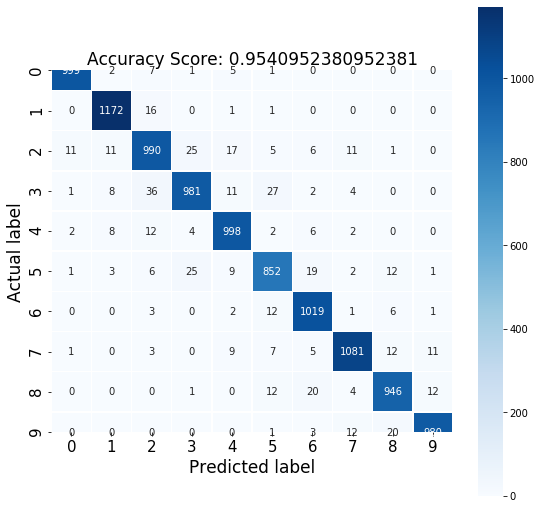

In [23]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

# 9) Classification Report

In [24]:
print (metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1015
           1       0.97      0.98      0.98      1190
           2       0.92      0.92      0.92      1077
           3       0.95      0.92      0.93      1070
           4       0.95      0.97      0.96      1034
           5       0.93      0.92      0.92       930
           6       0.94      0.98      0.96      1044
           7       0.97      0.96      0.96      1129
           8       0.95      0.95      0.95       995
           9       0.98      0.96      0.97      1016

    accuracy                           0.95     10500
   macro avg       0.95      0.95      0.95     10500
weighted avg       0.95      0.95      0.95     10500



Choosing an optimal model for a given task(comparing multiple classifier on a specific domain) requires selecting performance measures, for example accuracy, precision, recall and F1-score to compare the model performance.
We are getting 1.0 for precision, recall and f1-score. Accuracy is 100%. 

# 10) Conclusion:

**Why Multiclass classification** :
Problem is binary classification because here more than one class. whether it is 0,1,2 or 3. If there is only 2 class then we have to apply binary classification.


After importing data and extracting row by row data, we have to convert it to 8*8 because its 1D 64 array. for better visulization we have to reshape it.

By appliyng Logistic regression, we are getting 100% accuracy. We can clearl conclude from confusion matrix and classification report.

Thank you! 
